In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)   # converted dataframe to numpy array 

In [5]:
m,n = data.shape
np.random.shuffle(data)

In [6]:
# Splitting the data 
data_dev = data[0:1000].T
Y_dev = data_dev[0]

In [7]:
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

In [8]:
data_train = data[1000:m].T

In [9]:
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0

In [10]:
# All the functions that we need to perform gradient descent on our neural network
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2/784)
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.randn(10, 10) * np.sqrt(2/10)
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derive_ReLU(Z):
    return Z > 0

def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1,b1,W2,b2
    

In [11]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2, alpha)
        if i%50 ==0:
            print("Iteration: ",i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [12]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,500,0.1)

Iteration:  0
[8 8 7 ... 7 7 0] [9 2 3 ... 0 7 5]
Accuracy:  0.12239024390243902
Iteration:  50
[9 2 5 ... 0 2 1] [9 2 3 ... 0 7 5]
Accuracy:  0.7233658536585366
Iteration:  100
[9 2 3 ... 0 2 8] [9 2 3 ... 0 7 5]
Accuracy:  0.8325853658536585
Iteration:  150
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.8657560975609756
Iteration:  200
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.8800731707317073
Iteration:  250
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.8878780487804878
Iteration:  300
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.8937317073170732
Iteration:  350
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.8988048780487805
Iteration:  400
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.9020487804878049
Iteration:  450
[9 2 3 ... 0 2 5] [9 2 3 ... 0 7 5]
Accuracy:  0.9051463414634147


In [13]:
def make_predictions(X,W1,b1,W2,b2):
    _, _, _,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions
def test_prediction(index,W1,b1,W2,b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


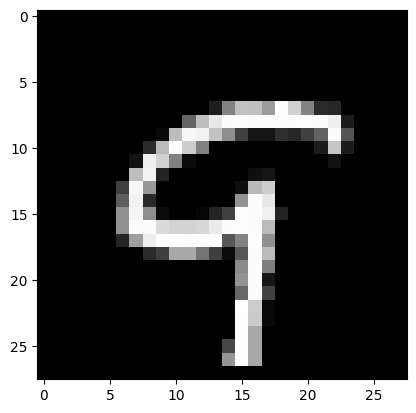

Prediction:  [2]
Label:  2


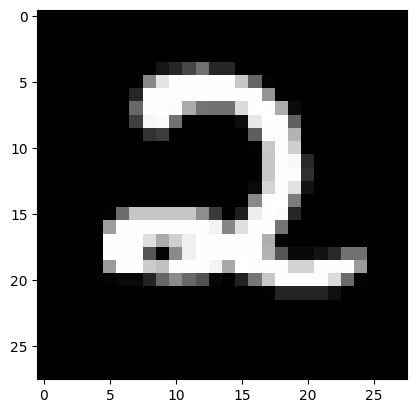

Prediction:  [3]
Label:  3


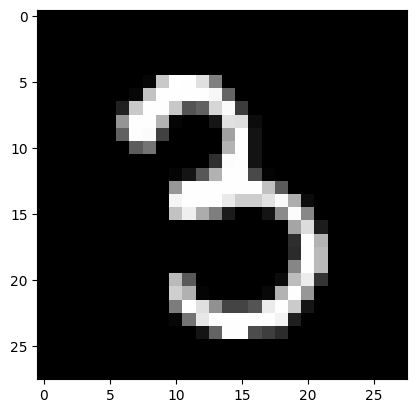

Prediction:  [7]
Label:  7


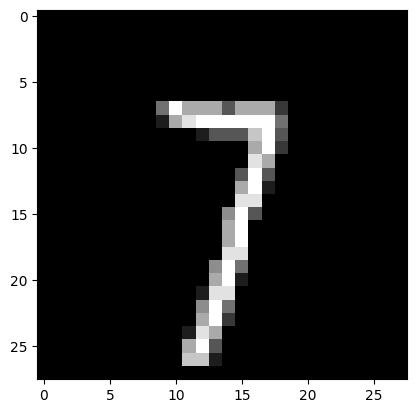

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 9 6 8 8 9 4 0 8 6 0 3 3 2 3 1 0 5 9 0 6 3 3 4 1 3 3 0 6 1 6 0 6 6 8 6 2
 9 4 5 3 0 6 3 4 3 1 3 9 8 5 2 0 6 7 2 5 2 2 0 5 1 1 2 2 7 2 4 7 7 5 6 1 3
 4 5 5 4 6 4 6 7 3 1 2 5 5 0 2 5 8 9 2 2 0 4 5 9 3 9 0 8 6 3 8 4 1 6 8 6 7
 8 0 0 7 2 8 8 6 6 9 2 5 0 7 5 4 8 3 7 0 5 7 0 6 5 4 7 9 1 2 1 5 8 1 0 5 8
 8 7 2 2 6 0 2 3 7 5 5 0 5 9 8 8 3 9 0 8 9 4 0 4 6 8 3 4 2 6 1 2 1 0 3 7 1
 3 3 0 5 1 0 9 8 4 4 9 1 3 2 2 8 3 5 9 3 2 1 5 5 4 6 7 8 2 4 7 2 8 4 0 1 7
 6 0 3 5 4 9 7 5 2 7 2 5 2 9 9 4 3 1 9 0 5 0 9 4 6 6 1 8 7 6 5 5 3 1 5 9 3
 2 8 6 1 0 0 1 5 6 1 4 1 9 9 1 6 0 9 0 8 6 6 2 8 5 9 3 2 8 8 1 2 7 9 8 7 6
 5 6 1 8 9 9 7 3 4 4 2 3 0 6 0 9 0 6 9 4 3 4 6 4 1 9 7 4 4 8 5 9 4 0 6 7 1
 7 4 7 0 8 5 9 1 9 6 5 6 9 7 1 2 6 1 4 5 8 8 4 8 4 3 4 1 0 6 3 8 3 7 3 4 5
 7 5 2 0 5 9 2 2 5 3 9 0 3 7 0 7 3 0 7 5 6 0 0 4 0 0 0 1 3 6 0 2 3 1 7 6 2
 1 0 5 5 3 4 7 0 8 8 6 9 2 3 0 3 4 0 3 3 2 6 5 7 9 5 4 4 7 0 1 1 8 8 7 8 0
 0 6 7 6 5 1 5 7 1 4 3 7 2 6 3 2 2 0 9 3 4 3 2 3 1 6 6 8 0 1 3 2 4 9 6 4 7
 8 2 4 5 6 3 9 2 2 3 6 9 

0.923